In [83]:

import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

image = cv2.imread("image_downloads/image_512.jpg")
base_image = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11,11), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (300, 5))
dilate = cv2.dilate(thresh, kernal, iterations=1)

cv2.imwrite("temp/sample_dilated.png", dilate)


True

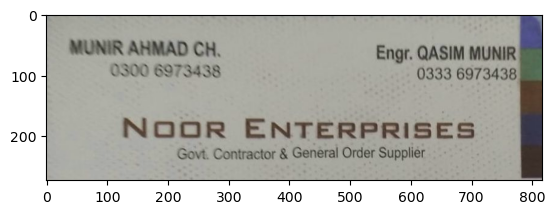

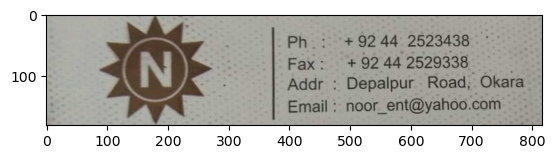

True

In [84]:


cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[1])
results = []

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    contour_area = cv2.contourArea(c)
    min_contour_area = 5000
    max_contour_area = 1000000

    # Filter contours based on size
    if min_contour_area < contour_area < max_contour_area:
        roi = base_image[y:y+h, x:x+w]
        cv2.rectangle(image, (x,y), (x+w, y+h), (36, 255, 12), 2)
        plt.imshow(roi)
        plt.show()
        ocr_result = pytesseract.image_to_string(roi, lang='eng', config='--psm 6')
        ocr_result = ocr_result.split('\n')
        for item in ocr_result:
            results.append(item)

cv2.imwrite("temp/sample_boxes.png", image)


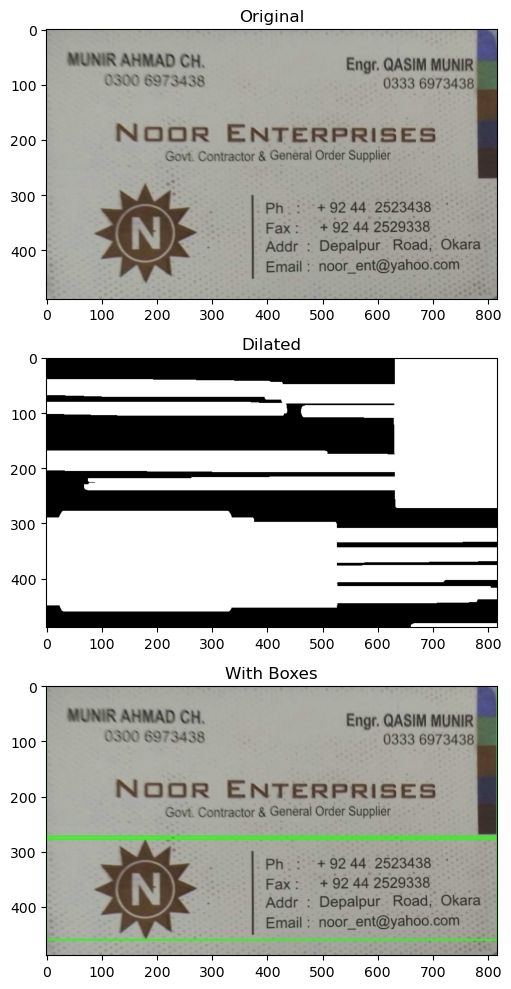

In [85]:

figure = plt.figure(figsize=(10,10))
plt.subplot(311),plt.imshow(base_image),plt.title('Original')
plt.subplot(312),plt.imshow(dilate, cmap='gray'),plt.title('Dilated')
plt.subplot(313),plt.imshow(image),plt.title('With Boxes')
plt.tight_layout()
plt.show()


In [86]:
entities = []
def filter_list(input_list):
    import re
    filtered_list = []

    for item in input_list:
        # Remove symbols and single characters using regular expression
        clean_item = re.sub(r'[^a-zA-Z0-9\s]', '', item)
        
        # Check if the cleaned item has more than one character
        if len(clean_item) > 1:
            filtered_list.append(clean_item)

    return filtered_list

results = filter_list(results)

for item in results:
    item = item.strip().replace('\n', '').replace('\x0c', '')

    if len(item) > 0:
        entities.append(item)

entities = list(set(entities))
print(entities)


['Email  noorentyahoocom', 'Addr  Depalpur Road Okara', 'Ph  92 44 2523438', 'Govt Contractor  General Order Supplier', 'NOOR ENTERPRISES', 'MUNIR AHMAD CH Engr QASIM MUNIR', '0300 6973438 0333 6973438', 'Fax 9244 2529338']


In [87]:

ocr_result_original = pytesseract.image_to_string(base_image)
print("original:")
print(ocr_result_original)

print("new:")
for item in entities:
    print(item)

original:
MUNIR AHMAD CH.
Q300 6973438

Engr. QASIM MUNIR
0333 6973438

NOOR ENTERPRISES

Govt. Contractor & General Order Supplier

Ph
Fax:

Addr :
Email :

+9244 2523438

+92 44 2529338
Depalpur Road; Okara
noor_ent@yahoo.com


new:
Email  noorentyahoocom
Addr  Depalpur Road Okara
Ph  92 44 2523438
Govt Contractor  General Order Supplier
NOOR ENTERPRISES
MUNIR AHMAD CH Engr QASIM MUNIR
0300 6973438 0333 6973438
Fax 9244 2529338
